In [ ]:
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt;plt.style.use('ggplot')
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
import warnings

## Dataset

In [ ]:
languages = []
data = []
X = []
y = []

with open('name2lang.txt', 'r') as f: 
    for line in f:
        line = line.split(',')
        name = line[0].strip()
        lang = line[1].strip()
        if not lang in languages:
            languages.append(lang)
        X.append(name)
        y.append(lang)
        data.append((name, lang))

n_languages = len(languages)

print(languages)
print(data[0:10])

['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian']
[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


### Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print(X_train)
print(len(X_train), len(X_test))

['Abashkin', 'Gulimov', 'Tzelobenok', 'Funnell', 'Zhui', 'Jukes', 'Togunov', 'Sabbag', 'Kartomyshev', 'Makhnenko', 'Sokolsky', 'Masuno', 'Varela', 'Moffat', 'Bonner', 'Berezovsky', 'Helkvist', 'Thurston', 'Tovstuha', 'Millar', 'Tulintsev', 'Furey', 'Isaenko', 'Kalachev', 'Takecare', 'Newcombe', 'Taku', 'Artibyakin', 'Saifulov', 'Morcos', 'Jagodnikov', 'Halifman', 'Bagaryakoff', 'Pavluhin', 'Mari', 'Awramchik', 'Agaltsov', 'Fisichev', 'Shizuma', 'Yankin', 'Luts', 'Toshitala', 'Germain', 'Botros', 'Poulter', 'Lischenko', 'Porter', 'Melendez', 'Ibu', 'Carr', 'Ursler', 'Aderikhin', 'Gimondi', 'Rzhevsky', 'Slater', 'Atkin', 'Yagafarov', 'Huraskin', 'Underhill', 'Pylin', 'Yuschenko', 'Ardovini', 'Tunison', 'Dobrovolsky', 'Bezyzvestnyh', 'Roussel', 'Balakshin', 'Trumbauer', 'Vallance', 'Boerio', 'Waugh', 'Baz', 'Reading', 'Komon', 'Ireson', 'Venables', 'Tikhotsky', 'Spada', 'Winfield', 'Mikhnov', 'Lubsky', 'Antar', 'Sheehan', 'Tuma', 'Yuzefovich', 'Yamburg', 'Yukhvidov', 'Mikhail', 'Chi', 'De

### Encoding names and language

In [ ]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
print(all_letters,n_letters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;' 57


In [ ]:
#One hot representation of the characters
def name_rep(name):
    rep = torch.zeros(len(name), 1, n_letters)
    for index, letter in enumerate(name):
        pos = all_letters.find(letter)
        rep[index][0][pos] = 1
    return rep

In [ ]:
def lang_rep(lang):
    return torch.tensor([languages.index(lang)], dtype=torch.long)

In [ ]:
gg = name_rep('Abreu')
print(gg);print(gg.size())

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [ ]:
lang_rep('Portuguese')

tensor([0])

### Basic visualisation

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}


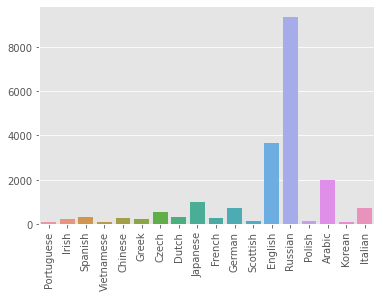

In [ ]:
count = {}
for l in languages: 
    count[l] = 0
for d in data:
    count[d[1]] += 1
print(count)
plt_ = sns.barplot(list(count.keys()), list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

## Basic network and testing inference

In [ ]:
class RNN_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_net, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_, hidden):      
        combined = torch.cat((input_, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [ ]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)

In [ ]:
def infer(net, name):
    net.eval()
    name_ohe = name_rep(name)
    hidden = net.init_hidden()
    
    for i in range(name_ohe.size()[0]):
        output, hidden = net(name_ohe[i], hidden)
    
    return output

In [ ]:
output = infer(net, 'Adam')
index = torch.argmax(output)
print(output, index)

tensor([[-2.8211, -2.8985, -2.8745, -2.9425, -2.9060, -2.8332, -2.8632, -2.9907,
         -2.9153, -2.8283, -2.8648, -3.0006, -2.9041, -2.7573, -2.9059, -2.8646,
         -2.9644, -2.9242]], grad_fn=<LogSoftmaxBackward>) tensor(13)


## Evaluate model

In [ ]:
def dataloader(npoints, X_, y_):
    to_ret = []
    for i in range(npoints):
        index_ = np.random.randint(len(X_))
        name, lang = X_[index_], y_[index_]
        to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
    return to_ret

In [ ]:
dataloader(2, X_train, y_train)

[('Martins',
  'English',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
def eval(net, n_points, k, X_, y_):
    #top k accuracy
    data_ = dataloader(n_points, X_, y_)
    correct = 0
    
    for name, language, name_ohe, lang_rep in data_:
        
        output = infer(net, name)
        val, indices = output.topk(k)
        
        if lang_rep in indices:
            correct += 1
            
    accuracy = correct/n_points
    return accuracy

eval(net, 1000, 3, X_test, y_test)

0.247

## Training

### Basic setup

In [ ]:
def train(net, opt, criterion, n_points):
    #Batch training
    opt.zero_grad()
    total_loss = 0
    
    data_ = dataloader(n_points, X_train, y_train)
    
    for name, language, name_ohe, lang_rep in data_:

        hidden = net.init_hidden()

        for i in range(name_ohe.size()[0]):
            output, hidden = net(name_ohe[i], hidden)
            
        loss = criterion(output, lang_rep)
        loss.backward(retain_graph=True)
        
        total_loss += loss
        
    opt.step()       
            
    return total_loss/n_points

In [ ]:
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [ ]:
%%time 
train(net, opt, criterion, 200)

CPU times: user 241 ms, sys: 2.64 ms, total: 244 ms
Wall time: 247 ms


tensor(10.2639, grad_fn=<DivBackward0>)

In [ ]:
eval(net, 1000, 1, X_test, y_test)

0.326

### Full training setup

In [ ]:
def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq=5):
    
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
    
    loss_arr = np.zeros(n_batches + 1)
    
    for i in range(n_batches):
        loss_arr[i+1] = (loss_arr[i]*i + train(net, opt, criterion, batch_size))/(i + 1)
        
        if i%display_freq == display_freq-1:
            clear_output(wait=True)
            
            print('Iteration', i, 'Top-1:', eval(net, len(X_test), 1, X_test, y_test), 'Top-2:', eval(net, len(X_test), 2, X_test, y_test), 'Loss', loss_arr[i])
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')
                      

Iteration 99 Top-1: 0.6763092269326684 Top-2: 0.7890274314214464 Loss 1.4604790210723877


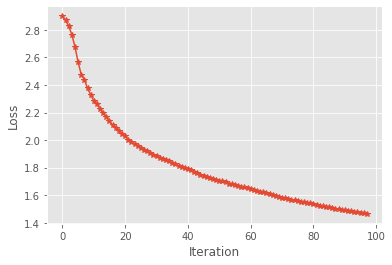

In [ ]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

## LSTM cell

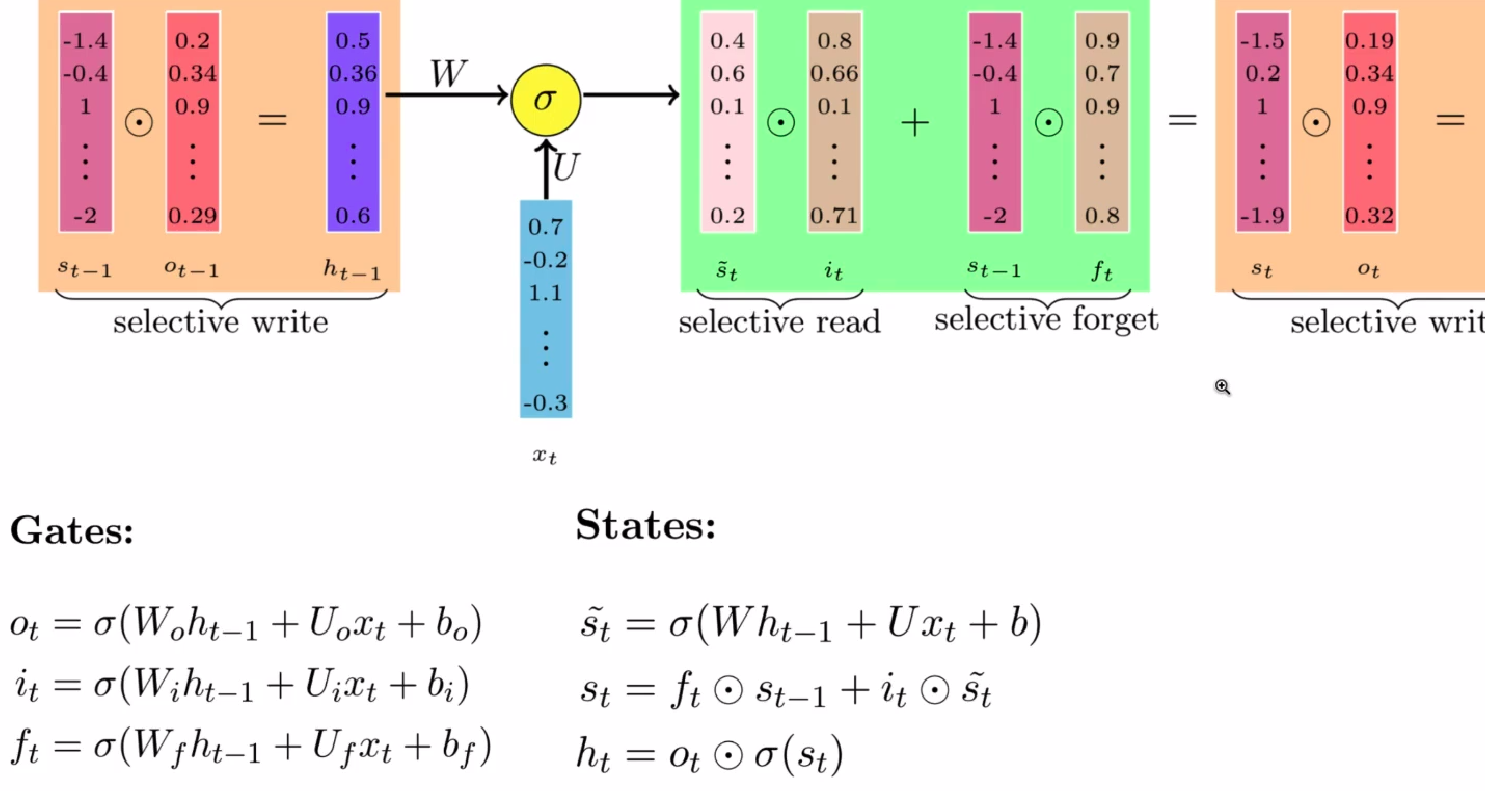

In [ ]:
pip install torchviz

     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=d2ecfe070f11c4a8cf9ef45ee4b054055369d6274060b732d42d16424e2523dd
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [ ]:
class LSTM_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_net, self).__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = nn.LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)
    
    def forward(self, input_, hidden):
      #in the input_(arg1,arg2,arg3) -> arg 1 - #characters in each word, arg2 - is the batch size (if you choose to give multiple inputs), arg3 - total #letters in our OHE of alphabets
        out, hidden = self.lstm_cell(input_.view(1, 1, -1), hidden)
        output = self.h2o(hidden[0])
        output = self.softmax(output)
        return output.view(1, -1), hidden
    
    def init_hidden(self):
      #Tuple -> (hidden state, cell state)
        return (torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size))

Iteration 99 Top-1: 0.5401496259351621 Top-2: 0.6957605985037406 Loss 1.8155931234359741


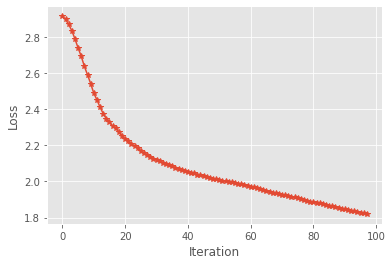

In [ ]:
n_hidden = 128
net = LSTM_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

## GRU Cell

In [ ]:
class GRU_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU_net, self).__init__()
        self.hidden_size = hidden_size
        self.gru_cell = nn.GRU(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)
    
    def forward(self, input_, hidden):
      #for input, arg1,arg2,arg3 -> #charcters, #batches, #encoding size of each character (basically the size of a single character's OHE)
        out, hidden = self.gru_cell(input_.view(1, 1, -1), hidden)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output.view(1, -1), hidden
    
    def init_hidden(self):
      #Here arg1, arg2, arg3 -> #layers, #batches, #hidden_size of neurons
        return torch.zeros(1, 1, self.hidden_size)

Iteration 99 Top-1: 0.5371571072319202 Top-2: 0.6778054862842893 Loss 1.8050812482833862


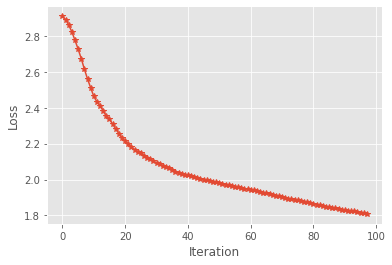

In [ ]:
n_hidden = 128
net = LSTM_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

**Exercise1**

In [ ]:
def testloader( X_test_, y_test_):
    to_ret = []
    lang_cnts = {}
    for i in range(len(X_test)):
        name, lang = X_test_[i], y_test_[i]
        if lang in lang_cnts:
          lang_cnts[lang]+=1
        else:
          lang_cnts[lang]=1

        to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
    return to_ret,lang_cnts

def acc_langwise(net, k, X_test_, y_test_):

    data_,lang_cnts = testloader(X_test_, y_test_)
    correct = {}
    for key in lang_cnts:
        correct[key] = 0

    for name, language, name_ohe, lang_rep in data_:
        output = infer(net, name)
        val, indices = output.topk(k)
        if lang_rep in indices:
            correct[language] += 1
  
    langwise_accuracy = {}
    for key in correct:
      langwise_accuracy[key] = "Accuracy: " + str(round(correct[key]/lang_cnts[key],2)) + "  Correct: " +  str(correct[key]) + "  Total: " + str(lang_cnts[key])
    return langwise_accuracy

acc_langwise(net, 3, X_test, y_test)

{'Arabic': 'Accuracy: 1.0  Correct:400  Total: 400',
 'Chinese': 'Accuracy: 0.0  Correct:0  Total: 54',
 'Czech': 'Accuracy: 0.0  Correct:0  Total: 104',
 'Dutch': 'Accuracy: 0.0  Correct:0  Total: 59',
 'English': 'Accuracy: 1.0  Correct:733  Total: 733',
 'French': 'Accuracy: 0.0  Correct:0  Total: 55',
 'German': 'Accuracy: 0.04  Correct:6  Total: 145',
 'Greek': 'Accuracy: 0.0  Correct:0  Total: 41',
 'Irish': 'Accuracy: 0.0  Correct:0  Total: 46',
 'Italian': 'Accuracy: 0.0  Correct:0  Total: 142',
 'Japanese': 'Accuracy: 0.11  Correct:22  Total: 198',
 'Korean': 'Accuracy: 0.0  Correct:0  Total: 19',
 'Polish': 'Accuracy: 0.0  Correct:0  Total: 28',
 'Portuguese': 'Accuracy: 0.0  Correct:0  Total: 15',
 'Russian': 'Accuracy: 0.99  Correct:1854  Total: 1877',
 'Scottish': 'Accuracy: 0.0  Correct:0  Total: 20',
 'Spanish': 'Accuracy: 0.0  Correct:0  Total: 59',
 'Vietnamese': 'Accuracy: 0.0  Correct:0  Total: 15'}